Program Input:
Enter the data values separated by spaces: 1 3 5 7 9 11 13 15 17 19 20 4 
Enter the number of bins: 4

Program Output:
Original Data: [1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 20.0, 4.0]
Equi-depth Bins: [[1.0, 3.0, 4.0], [5.0, 7.0, 9.0], [11.0, 13.0, 15.0], [17.0, 19.0, 20.0]]
Bins with Means: [[np.float64(2.6666666666666665), np.float64(2.6666666666666665), np.float64(2.6666666666666665)], [np.float64(7.0), np.float64(7.0), np.float64(7.0)], [np.float64(13.0), np.float64(13.0), np.float64(13.0)], [np.float64(18.666666666666668), np.float64(18.666666666666668), np.float64(18.666666666666668)]]
Bins with Boundaries: [[1.0, 4.0, 4.0], [5.0, 9.0, 9.0], [11.0, 15.0, 15.0], [17.0, 20.0, 20.0]]

Line Plot:


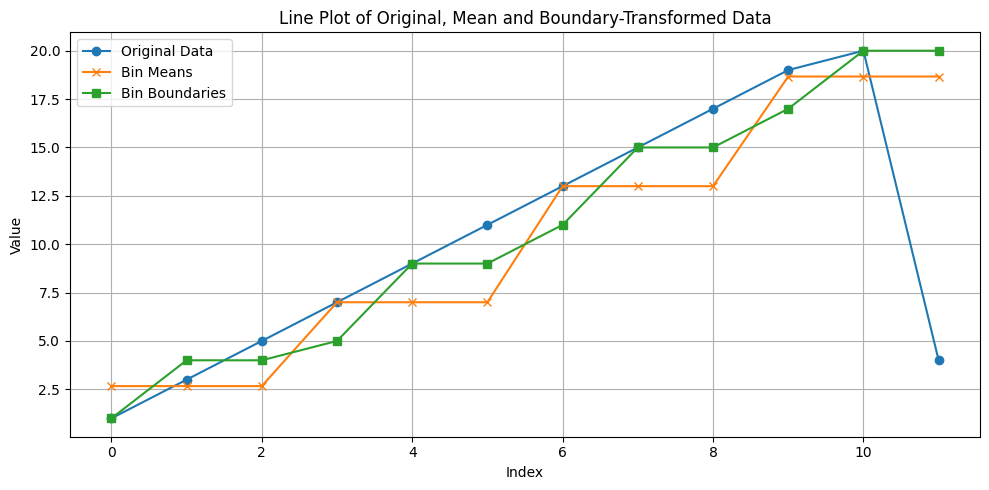


Box Plot:


<ipython-input-1-c8814e88a67b>:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data, flattened_means, flattened_boundaries], labels=["Original", "Means", "Boundaries"])


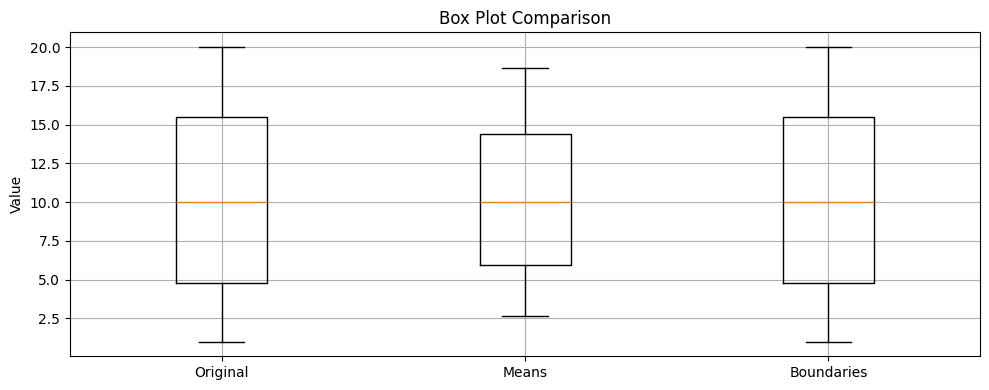


Bar Chart:


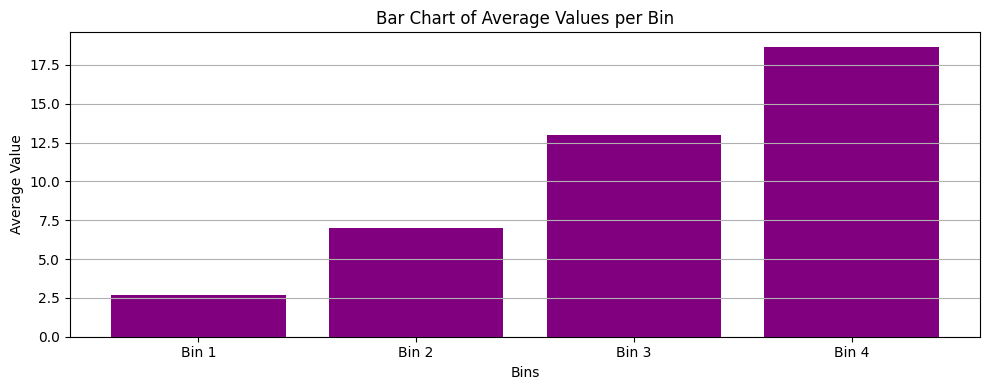

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform equi-depth binning
def equi_depth_binning(data, num_bins):
    sorted_data = sorted(data)
    bin_size = len(data) // num_bins
    bins = [sorted_data[i * bin_size: (i + 1) * bin_size] for i in range(num_bins - 1)]
    bins.append(sorted_data[(num_bins - 1) * bin_size:])
    return bins

# Replace each value in the bin with the bin mean
def bin_means(bins):
    return [[np.mean(bin)] * len(bin) for bin in bins]

# Replace each value in the bin with the closest boundary
def bin_boundaries(bins):
    new_bins = []
    for bin in bins:
        min_val, max_val = min(bin), max(bin)
        new_bins.append([min_val if x < (min_val + max_val) / 2 else max_val for x in bin])
    return new_bins

# Function to plot line plots, box plots, and bar charts
def plot_various_graphs(data, bins, mean_bins, boundary_bins):
    flattened_means = [val for bin in mean_bins for val in bin]
    flattened_boundaries = [val for bin in boundary_bins for val in bin]

    # Line Plot
    plt.figure(figsize=(10, 5))
    plt.plot(data, label="Original Data", marker='o')
    plt.plot(flattened_means, label="Bin Means", marker='x')
    plt.plot(flattened_boundaries, label="Bin Boundaries", marker='s')
    plt.title("Line Plot of Original, Mean and Boundary-Transformed Data")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    print("\n\033[1mLine Plot:\033[0m")
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 4))
    plt.boxplot([data, flattened_means, flattened_boundaries], labels=["Original", "Means", "Boundaries"])
    plt.title("Box Plot Comparison")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    print("\n\033[1mBox Plot:\033[0m")
    plt.show()

    # Bar Chart - Average value per bin
    bin_avgs = [np.mean(b) for b in bins]
    x = [f"Bin {i+1}" for i in range(len(bins))]
    plt.figure(figsize=(10, 4))
    plt.bar(x, bin_avgs, color='purple')
    plt.title("Bar Chart of Average Values per Bin")
    plt.xlabel("Bins")
    plt.ylabel("Average Value")
    plt.grid(axis='y')
    plt.tight_layout()
    print("\n\033[1mBar Chart:\033[0m")
    plt.show()

# ====== Main Program ======

# User input
print("\033[1mProgram Input:\033[0m")
data = list(map(float, input("Enter the data values separated by spaces: ").split()))
num_bins = int(input("Enter the number of bins: "))

# Equi-depth bins
bins = equi_depth_binning(data, num_bins)

# Transformed bins
mean_bins = bin_means(bins)
boundary_bins = bin_boundaries(bins)

# Bold program output title
print("\n\033[1mProgram Output:\033[0m")
print("Original Data:", data)
print("Equi-depth Bins:", bins)
print("Bins with Means:", mean_bins)
print("Bins with Boundaries:", boundary_bins)

# Plot various types of graphs
plot_various_graphs(data, bins, mean_bins, boundary_bins)


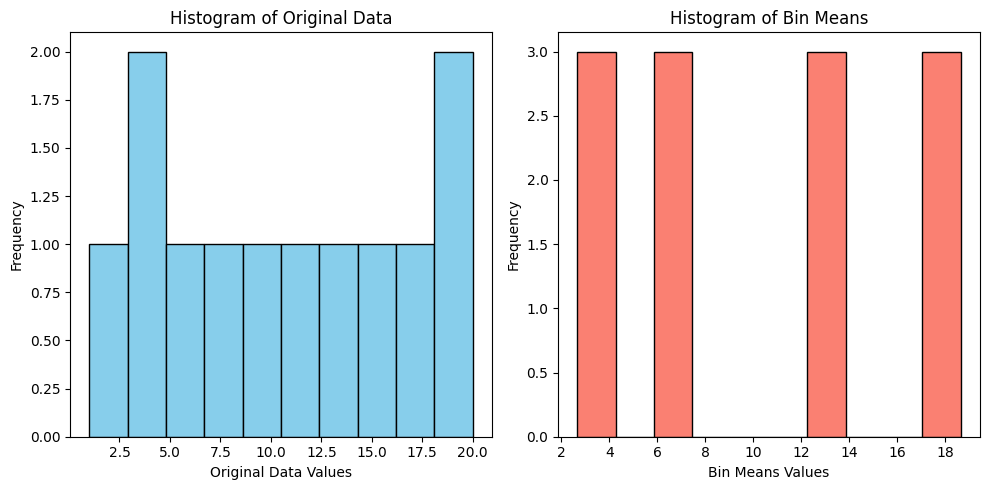

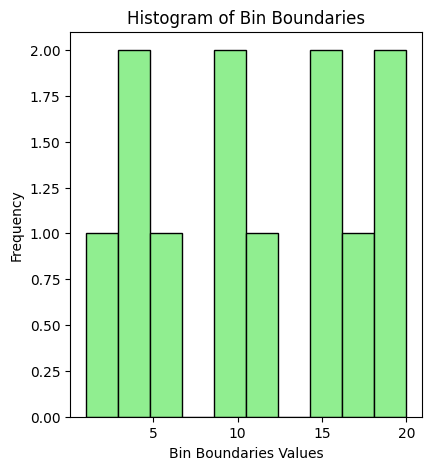

In [4]:
# prompt: plot separate histograms for the above code

import matplotlib.pyplot as plt
import pandas as pd # Import pandas to work with DataFrames
import numpy as np

# Assuming 'data', 'bins', 'mean_bins', 'boundary_bins' are available
# from the previous code execution

# Create a DataFrame from the available data
df = pd.DataFrame({
    'Original': data,
    'Means': np.concatenate(mean_bins),  # Flatten mean_bins
    'Boundaries': np.concatenate(boundary_bins)  # Flatten boundary_bins
})

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Original'], bins=10, color='skyblue', edgecolor='black') # Adjust bins as needed
plt.title('Histogram of Original Data')
plt.xlabel('Original Data Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Means'], bins=10, color='salmon', edgecolor='black') # Adjust bins as needed
plt.title('Histogram of Bin Means')
plt.xlabel('Bin Means Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Boundaries'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Bin Boundaries')
plt.xlabel('Bin Boundaries Values')
plt.ylabel('Frequency')
plt.show()